# Trap Optimization

#### We have a desired intensity field. We are seeking a phase such that the intensity field has desired characteristics. For this purpose, implement a direct search algorithm (DSA), where we 
#### - choose a trial phase field
#### - pick random pixel 
#### - change value of that pixel, and get a new intensity $I_m$
#### - generate metric, and decide whether to accept or reject change
#### - Iterate

## Begin with desired intensity hologram
#### $M$ bright spots, each bright spot at location $r_{m}$
#### Say the field is a DoG
$u(\xi,\eta,z) = \frac{-u_{0}\, i\pi}{\lambda z}e^{ikz + \frac{i\pi}{\lambda z}(\xi^2 + \eta^2)} \times [\frac{1}{a}e^{-\frac{\pi^2}{\lambda^2 z^2 a}(\xi^2+\eta^2)} - \frac{1}{b}e^{-\frac{\pi^2}{\lambda^2 z^2 b}(\xi^2+\eta^2)}]$, where $a = (\frac{1}{\Sigma^2}-\frac{i\pi}{\lambda z})$ and $b = (\frac{1}{\sigma^2}-\frac{i\pi}{\lambda z})$

In [86]:
import numpy as np
from scipy import special as sp
from scipy import constants as sc
from matplotlib import pyplot as plt

#define relevant quantities
P = 1 #power ~ 1 Watt
pi = sc.pi
e_0 = sc.epsilon_0 #vacuum permittivity
wavelength = 1064*10**-9 
k = 2*pi/wavelength
w_0 = 1*10**-6 #beam waist
z_R = pi*w_0**2/wavelength #Rayleigh range (~2.9 um)
f = 2*10**-6 #choose some other value that may be more accurate
u_0 = np.sqrt(P/(pi*(w_0**2*(1+(f/z_R)**2)))) #intensity is proportional to u_0^2. And u_0^2 is power/area

def optimize():
    #first step is to have an array for the hologram. This is the intensity, discretized. So, basically, this would be
    #I_m(D)
    z = f
    kappa = 1j*pi/(wavelength*z) #quantity to simplify calculations
    Sigma, sigma  = 10*f, 5*f #Sigma (larger value) and sigma define our fat and narrow gaussians resp.
    a, b = (1/Sigma**2 - kappa), (1/sigma**2 - kappa)
    xmax, dx = 10e-5, 10e-7
    xlist = np.linspace(-xmax, xmax, int(xmax/dx))
    ylist = np.linspace(-xmax, xmax, int(xmax/dx))
    int_d_DoG = np.zeros([len(range(int(xmax/dx))),len(range(int(xmax/dx)))]) #desired intensity of the hologram, DoG
    for xi in range(len(xlist)):
        for yi in range(len(ylist)):
            #xi and yi will denote the pixel
            x, y = xlist[xi], ylist[yi]
            u1 = -kappa*u_0 *  np.exp(1j*k*z + kappa*(x**2+y**2))
            u2 = np.exp(-pi**2 * (x**2+y**2) /(wavelength**2*z**2*a))
            u = -kappa*u_0 *  np.exp(1j*k*z + kappa*(x**2+y**2)) * \
            ((1/a) * np.exp(-pi**2 * (x**2+y**2) /(wavelength**2*z**2*a)) - \
            (1/b) * np.exp(-pi**2 * (x**2+y**2) /(wavelength**2*z**2*b)))
            int_d_DoG[xi][yi] = np.imag(u)**2 + np.real(u)**2
    plt.imshow(int_d_DoG, cmap = 'gray', interpolation = 'nearest')
    return 
    #second step is to have a trial phase function. e.g. phi = l*theta, or phi = k*rho^2*z/(2*f^2)
    #third step is to change a pixel of this phase randomly -> observe corresponding new intensity I_m
    #if improved, accept. Else, reject.

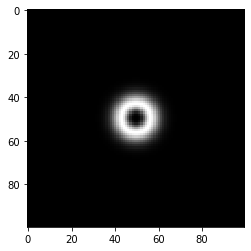

In [87]:
optimize()

#### Notes:
#### One of the degrees of freedom is the DoG shape, defined by $\Sigma$ and $\sigma$, and we can choose what suits our fancy. They ought to be ~$f$. 